<a href="https://colab.research.google.com/github/MergenTeT/CNN-Model-Training/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
from keras.utils.np_utils import to_categorical
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((-1,28,28,1))
x_test = x_test.astype('float32')/255

y_train =to_categorical(y_train)
y_test =to_categorical(y_test) 

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [ ]:
from keras import layers,models
model =models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())

model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 32)         

In [ ]:
model.compile(optimizer = "rmsprop",loss = "categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size = 64,validation_split = 0.1)

Epoch 1/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0580 - accuracy: 0.9872 - val_loss: 0.0172 - val_accuracy: 0.9975
Epoch 2/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0559 - accuracy: 0.9874 - val_loss: 0.0239 - val_accuracy: 0.9962
Epoch 3/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0539 - accuracy: 0.9879 - val_loss: 0.0306 - val_accuracy: 0.9932
Epoch 4/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0542 - accuracy: 0.9871 - val_loss: 0.0206 - val_accuracy: 0.9947
Epoch 5/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0591 - accuracy: 0.9865 - val_loss: 0.0328 - val_accuracy: 0.9908
Epoch 6/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0593 - accuracy: 0.9862 - val_loss: 0.0448 - val_accuracy: 0.9910
Epoch 7/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0575 - accuracy: 0.9869 - val_loss: 0.0411 - val_accuracy: 0.9910
Epoch 

In [ ]:
test_loss,test_acc = model.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0459 - accuracy: 0.9889


In [ ]:
from tensorflow.keras.models import load_model
model.save('model-OCR.h5')

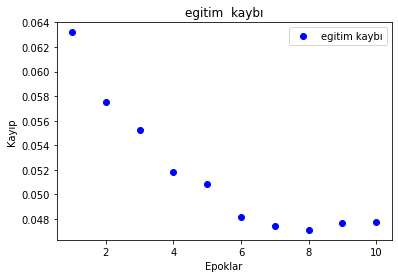

In [ ]:
import matplotlib.pyplot as plt


hist=history.history
loss_values = hist['loss']


epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label = 'egitim kaybı')

plt.title('egitim  kaybı')
plt.xlabel('Epoklar')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

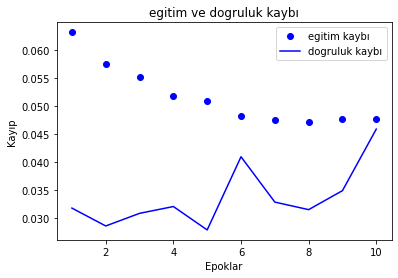

In [ ]:
import matplotlib.pyplot as plt


hist=history.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label = 'egitim kaybı')
plt.plot(epochs,val_loss_values,'b',label = 'dogruluk kaybı')
plt.title('egitim ve dogruluk kaybı')
plt.xlabel('Epoklar')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

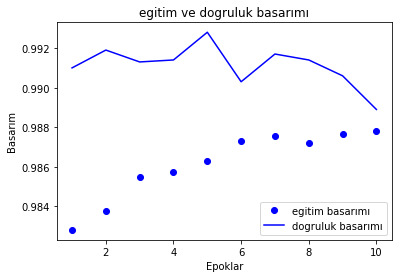

In [ ]:
plt.clf()
acc = hist['accuracy']
val_acc = hist['val_accuracy']
plt.plot(epochs,acc,'bo',label = 'egitim basarımı')
plt.plot(epochs,val_acc,'b',label = 'dogruluk basarımı')
plt.title('egitim ve dogruluk basarımı')
plt.xlabel('Epoklar')
plt.ylabel('Basarım')
plt.legend()
plt.show()

5 Epoch dan sonra overfiting e giriyor . 

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.26890975],
       [0.9982631 ],
       [0.86506915],
       ...,
       [0.08152511],
       [0.10904174],
       [0.3410374 ]], dtype=float32)